http://archive.ics.uci.edu/ml/datasets/Abalone \

***Abalone Data Set***

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant) \
Length / continuous / mm / Longest shell measurement \
Diameter / continuous / mm / perpendicular to length \
Height / continuous / mm / with meat in shell \
Whole weight / continuous / grams / whole abalone \
Shucked weight / continuous / grams / weight of meat \
Viscera weight / continuous / grams / gut weight (after bleeding) \
Shell weight / continuous / grams / after being dried \
Rings / integer / -- / +1.5 gives the age in years \

In [ ]:
headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv(url, names = headers)
print('The shape of the DataFrame is', df.shape)
df.head(100)

The shape of the DataFrame is (4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
95,M,0.665,0.535,0.195,1.6060,0.5755,0.3880,0.480,14
96,M,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9
97,M,0.470,0.375,0.130,0.5230,0.2140,0.1320,0.145,8
98,M,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# List features for visualization
features = headers[0:-1]
print(features)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [ ]:
# Label Encoder
# 0: Female     1: Infant       2: Male

LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])
df['Sex'].head(10)

0    2
1    2
2    0
3    2
4    1
5    1
6    0
7    0
8    2
9    0
Name: Sex, dtype: int64

In [ ]:
df['Rings'] = [1 if b in range(6,13) else 0 for b in df.Rings]
df['Rings'].value_counts()

1    3295
0     882
Name: Rings, dtype: int64

Class 0: 882
Class 1: 3295
Proportion: 0.27 : 1


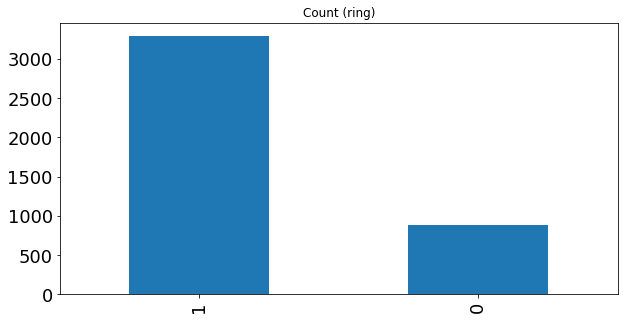

In [ ]:
ring_count = df.Rings.T.value_counts()
print('Class 0:', ring_count[0])
print('Class 1:', ring_count[1])
print('Proportion:', round(ring_count[0] / ring_count[1], 2), ': 1')
ring_count.plot(kind = 'bar', title = 'Count (ring)', figsize = (10,5), fontsize = 18)

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Rings==0]
df_minority = df[df.Rings==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority,   
                                 replace=True,                          # sample with replacement
                                 n_samples=df[df.Rings==0].shape[0],    # to match majority class
                                 random_state=123)                      # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Rings.value_counts()
# 1    882
# 0    882
# Name: balance, dtype: int64

1    882
0    882
Name: Rings, dtype: int64

In [ ]:
#split dataframe into X and y
X = df[features].values
print(X.shape)
y = df['Rings'].values
print(y.shape)

(4177, 8)
(4177,)


In [ ]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 4)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


In [ ]:
#cau 4
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LG_classifier = LogisticRegression()
LG_classifier.fit(X_train,y_train)

y_pred_LG = LG_classifier.predict(X_test)

acc_score_LG = metrics.accuracy_score(y_pred_LG,y_test) 
print(' Logistic Regression accuracy: ',acc_score_LG)

print(classification_report(y_test,y_pred_LG))

 Logistic Regression accuracy:  0.8205741626794258
              precision    recall  f1-score   support

           0       0.69      0.15      0.24       163
           1       0.83      0.98      0.90       673

    accuracy                           0.82       836
   macro avg       0.76      0.57      0.57       836
weighted avg       0.80      0.82      0.77       836



In [ ]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
# support vector machine
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', gamma = 0.01, C = 100)
svm_classifier.fit(X_train,y_train)

y_pred_svm = svm_classifier.predict(X_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm,y_test) 
print('SVM (linear) accuracy: ',acc_score_svm)

print(classification_report(y_test,y_pred_svm))

SVM (linear) accuracy:  0.8433014354066986
              precision    recall  f1-score   support

           0       0.70      0.34      0.46       163
           1       0.86      0.96      0.91       673

    accuracy                           0.84       836
   macro avg       0.78      0.65      0.68       836
weighted avg       0.83      0.84      0.82       836



In [ ]:
# support vector machine
from sklearn.svm import SVC 
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X_train,y_train)

y_pred_svm = svm_classifier.predict(X_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm,y_test) 
print('SVM (sigmoid) accuracy: ', acc_score_svm)

print(classification_report(y_test,y_pred_svm))

SVM (sigmoid) accuracy:  0.6698564593301436
              precision    recall  f1-score   support

           0       0.18      0.20      0.19       163
           1       0.80      0.78      0.79       673

    accuracy                           0.67       836
   macro avg       0.49      0.49      0.49       836
weighted avg       0.68      0.67      0.68       836



In [ ]:
# support vector machine
from sklearn.svm import SVC 
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(X_train,y_train)

y_pred_svm = svm_classifier.predict(X_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm,y_test) 
print('SVM (poly) accuracy: ', acc_score_svm)

print(classification_report(y_test,y_pred_svm))

SVM (poly) accuracy:  0.8277511961722488
              precision    recall  f1-score   support

           0       0.70      0.20      0.31       163
           1       0.84      0.98      0.90       673

    accuracy                           0.83       836
   macro avg       0.77      0.59      0.61       836
weighted avg       0.81      0.83      0.79       836



In [ ]:
# support vector machine
from sklearn.svm import SVC 
svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)

y_pred_svm = svm_classifier.predict(X_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm,y_test) 
print('SVM (rbf) accuracy: ', acc_score_svm)

print(classification_report(y_test,y_pred_svm))

SVM (rbf) accuracy:  0.8433014354066986
              precision    recall  f1-score   support

           0       0.82      0.25      0.38       163
           1       0.84      0.99      0.91       673

    accuracy                           0.84       836
   macro avg       0.83      0.62      0.65       836
weighted avg       0.84      0.84      0.81       836



In [ ]:
# k-Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifer = KNeighborsClassifier()
knn_classifer.fit(X_train,y_train)

y_pred_knn = knn_classifer.predict(X_test)

acc_score_knn = metrics.accuracy_score(y_pred_knn,y_test) 
print('k-Neighbors accuracy: ',acc_score_knn)

print(classification_report(y_test,y_pred_knn))

k-Neighbors accuracy:  0.8229665071770335
              precision    recall  f1-score   support

           0       0.56      0.41      0.48       163
           1       0.87      0.92      0.89       673

    accuracy                           0.82       836
   macro avg       0.71      0.67      0.68       836
weighted avg       0.81      0.82      0.81       836



In [ ]:
# Multinominal naive bayes
from sklearn.naive_bayes import GaussianNB
gnb_classifer = GaussianNB()
gnb_classifer.fit(X_train, y_train)

y_pred_gnb = gnb_classifer.predict(X_test)
acc_score_gnb = metrics.accuracy_score(y_pred_gnb,y_test)
print('Multinominal NB model accuracy: ', acc_score_gnb)

print(classification_report(y_test,y_pred_gnb))

Multinominal NB model accuracy:  0.7655502392344498
              precision    recall  f1-score   support

           0       0.39      0.36      0.37       163
           1       0.85      0.86      0.86       673

    accuracy                           0.77       836
   macro avg       0.62      0.61      0.61       836
weighted avg       0.76      0.77      0.76       836



In [ ]:
#MultiLayer Perceptron
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64,64),activation='relu',solver='sgd',batch_size=64, max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('MultiLayer Perceptron accuracy is',accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

MultiLayer Perceptron accuracy is 0.854066985645933
              precision    recall  f1-score   support

           0       0.70      0.45      0.54       163
           1       0.88      0.95      0.91       673

    accuracy                           0.85       836
   macro avg       0.79      0.70      0.73       836
weighted avg       0.84      0.85      0.84       836



In [ ]:
#cau 5-6-7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
# define model
model = Sequential()
model.add(Dense(500, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2000,batch_size=40, verbose=2, callbacks=[es])

# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_train, y_train, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1/2000
84/84 - 0s - loss: 0.5389 - accuracy: 0.7806 - val_loss: 0.4870 - val_accuracy: 0.8050
Epoch 2/2000
84/84 - 0s - loss: 0.5047 - accuracy: 0.7848 - val_loss: 0.4670 - val_accuracy: 0.8050
Epoch 3/2000
84/84 - 0s - loss: 0.4845 - accuracy: 0.7860 - val_loss: 0.4516 - val_accuracy: 0.8050
Epoch 4/2000
84/84 - 0s - loss: 0.4664 - accuracy: 0.7929 - val_loss: 0.4394 - val_accuracy: 0.8170
Epoch 5/2000
84/84 - 0s - loss: 0.4506 - accuracy: 0.7986 - val_loss: 0.4230 - val_accuracy: 0.8194
Epoch 6/2000
84/84 - 0s - loss: 0.4355 - accuracy: 0.8108 - val_loss: 0.4113 - val_accuracy: 0.8301
Epoch 7/2000
84/84 - 0s - loss: 0.4229 - accuracy: 0.8159 - val_loss: 0.4059 - val_accuracy: 0.8361
Epoch 8/2000
84/84 - 0s - loss: 0.4131 - accuracy: 0.8174 - val_loss: 0.3973 - val_accuracy: 0.8373
Epoch 9/2000
84/84 - 0s - loss: 0.4046 - accuracy: 0.8216 - val_loss: 0.3893 - val_accuracy: 0.8385
Epoch 10/2000
84/84 - 0s - loss: 0.4001 - accuracy: 0.8243 - val_loss: 0.3929 - val_accuracy: 0.8397

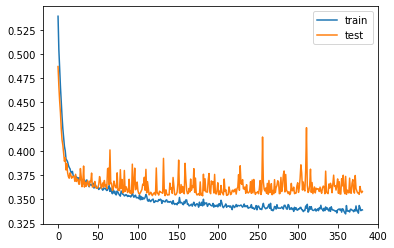

In [ ]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()